In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
from matplotlib import pyplot as plt



    
def agregaarchivo(data_file,df_marks):
    
    # Delimiter
    data_file_delimiter ='\s+'
    
    # The max column count a line in the file could have
    largest_column_count = 0

    # Loop the data lines
    with open(data_file, 'r') as temp_f:
        # Read the lines
        lines = temp_f.readlines()

        for l in lines:
            # Count the column count for the current line
            column_count = len(l.split())+ 1

            # Set the new most column count
            largest_column_count = column_count if largest_column_count < column_count else largest_column_count

    # Close file
    temp_f.close()

    # Generate column names (will be 0, 1, 2, ..., largest_column_count - 1)
    column_names = [i for i in range(0, largest_column_count)]

    # Read csv
    df = pd.read_csv(data_file, header=None, delim_whitespace=True, names=column_names)
    # print(df)

    row=df.shape[0]
    column=df.shape[1]
    print(row)
    print(column)


    Satélite=0
    S4=0
    for y in range(0, df.shape[0]):
        Año=df[0][y]
        Tiempo=df[1][y]*24*3600+df[2][y]
        Nsats=df[3][y]
        #print("#Satélite:",Nsats)
        for x in range(0,df.shape[1]):
            if (x-4)%4==0 and ((Nsats+1)*4)> x > 3:
                #print("x:",x)
                #print("Satélite:",df[x][y])
                Satélite=df[x][y]

            if (x-5) % 4==0 and ((Nsats+1)*4)>x>4:
                #print("S4:",df[x][y])
                S4=df[x][y]

            if (x-6) % 4==0 and ((Nsats+1)*4)>x>5:
                #print("Az:",df[x][y])
                Az=df[x][y]

            if (x-7) % 4==0 and ((Nsats+1)*4)>x>6:
                #print("Elv:",df[x][y])
                Elv=df[x][y]



                new_row = { 'Año':Año,'Tiempo':Tiempo,'PRN':Satélite, 'S4':S4,'Az':Az,'Elv':Elv}
                #append row to the dataframe
                df_marks = df_marks.append(new_row, ignore_index=True)

    return df_marks
    
    
 # Input
data_file = "/home/gfajardo/Desktop/lbht_190502.s4"
data_file2 = "/home/gfajardo/Desktop/lapu_181204.s4"

#Creating a new dataframe
df_marks = pd.DataFrame(columns=['Año','Tiempo','PRN','S4','Az','Elv'])    

lista=agregaarchivo(data_file,df_marks)
lista=agregaarchivo(data_file2,lista)
print(lista)

1434
53
1429
57
        Año      Tiempo    PRN    S4     Az   Elv
0      19.0  10540810.0    5.0  0.07  270.9  26.8
1      19.0  10540810.0    7.0  0.05  112.9  27.6
2      19.0  10540810.0    9.0  0.08   40.3  34.4
3      19.0  10540810.0   11.0  0.12  102.4  12.8
4      19.0  10540810.0   13.0  0.11  215.4  23.4
5      19.0  10540810.0   17.0  0.04   10.7  39.6
6      19.0  10540810.0   19.0  0.08  356.6  23.4
7      19.0  10540810.0   28.0  0.04  213.4  68.0
8      19.0  10540810.0   30.0  0.05  153.2  45.7
9      19.0  10540810.0  138.0  0.10  279.6  16.7
10     19.0  10540870.0    5.0  0.09  271.5  26.7
11     19.0  10540870.0    7.0  0.09  112.4  27.5
12     19.0  10540870.0    9.0  0.05   40.0  34.0
13     19.0  10540870.0   11.0  0.10  102.8  12.8
14     19.0  10540870.0   13.0  0.10  215.3  23.8
15     19.0  10540870.0   17.0  0.04   10.9  40.0
16     19.0  10540870.0   19.0  0.09  356.7  23.8
17     19.0  10540870.0   28.0  0.04  212.2  67.7
18     19.0  10540870.0   30.0  0.

[0.07 0.05 0.08 ... 0.04 0.02 0.11]
[[270.9  26.8]
 [112.9  27.6]
 [ 40.3  34.4]
 ...
 [282.6  71.9]
 [ 83.8  71.3]
 [285.1  23. ]]


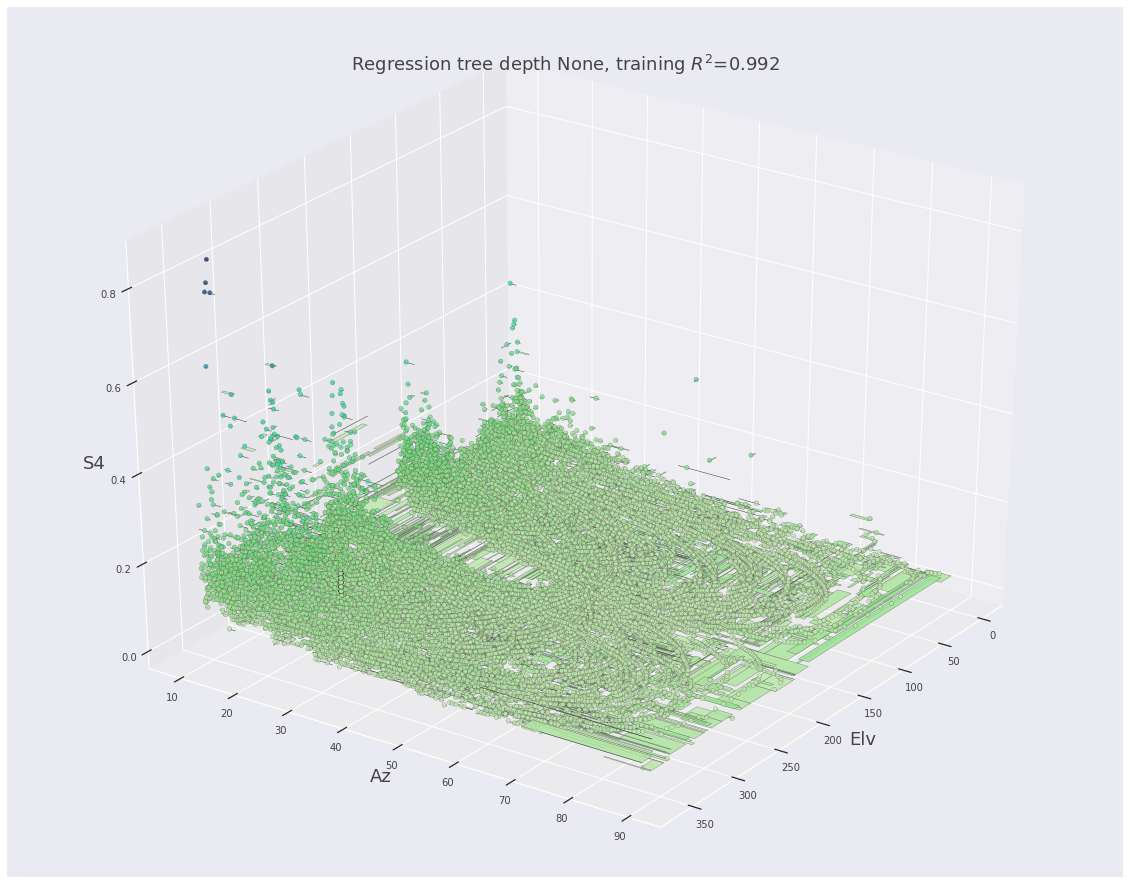

In [18]:
from sklearn.datasets import *
from sklearn import tree
from dtreeviz.trees import *

from mpl_toolkits.mplot3d import Axes3D
from dtreeviz.trees import *





y = lista['S4'].values

print(y)

features = [4,5]
X = lista.values[:,features]
#X=ion['60S','Sig'].values
print(X)

figsize = (20,16)
fig = plt.figure(figsize=figsize)


ax = fig.add_subplot(111, projection='3d')

t = rtreeviz_bivar_3D(ax,
                      X, y,
                      max_depth=None,
                      feature_names=['Elv','Az'],
                      target_name='S4',
                      fontsize=18,
                      elev=30,
                      azim=35,
                      dist=10,
                      show={'splits','title'})



plt.show()

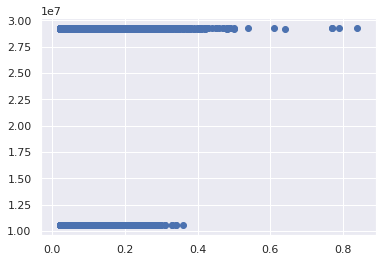

In [20]:
import pylab as pl
import numpy as np
X = lista['S4']
Y = lista['Tiempo']

pl.scatter(X,Y)
